In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Banknote-authentication-dataset-open-ml.csv')
v1_values = data['V1']
v2_values = data['V2']


In [4]:
# calculate mean
v1_mean = np.mean(v1_values)
v2_mean = np.mean(v2_values)
print(v1_mean, v2_mean)

#v1_mean = v1_values.mean()
#v2_mean = v2_values.mean()

# calculate variance
v1_var = np.var(v1_values)
v2_var = np.var(v2_values)
print(v1_var, v2_var)

# Standard Daviation
# numpy way of std. This does not divide by N-1. This will return nan if there is empty value.
np.std(v1_values)
# numpy way which divide std by N-1. This will return nan if there is empty value.
np.std(v1_values, ddof=1)
# use this to calc std of non-empty values
np.nanstd(v1_values, ddof=1)

# pandas way of std. This does divide by N-1. This will return std of non-empty values.
v1_std = v1_values.std()
v2_std = v2_values.std()
print(v1_std, v2_std)


0.43373525728862977 1.9223531209912539
8.075408962045568 34.42060347594198
2.8427625862451658 5.869046743580378


In [6]:
# Normalize data first in order to get successful result
data_normalized = (data-data.mean())/data.std()

# Separate Training data and Test data
y = data_normalized.Class
X_train, X_test, y_train, y_test = train_test_split(data_normalized, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#training_data = np.column_stack((data_notmalized['V1'][:3]))


(1097, 5) (1097,)
(275, 5) (275,)


In [11]:
#v1_v2 = np.column_stack((v1_values, v2_values)) # This is un-normalized data
v1_v2 = np.column_stack((data_normalized['V1'], data_normalized['V2']))
km = KMeans(n_clusters=2)
km_res = km.fit(X_train, y_train)
predictions = km.predict(X_test) # both steps can be combined using KMeans(..).fit_predict(v1_v2)
clusters = km.cluster_centers_

print(predictions[:5])
print(clusters)

[0 0 1 1 1]
[[ 0.65347518  0.3869771  -0.1338909   0.04257006 -0.89439447]
 [-0.794872   -0.46819437  0.13422479 -0.03299702  1.11725997]]


Score: -945.5323655227971


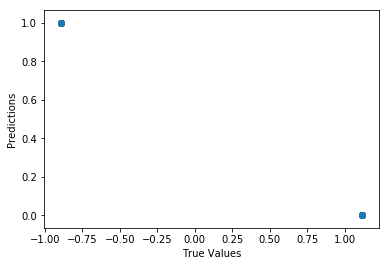

In [10]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
print('Score:', km_res.score(X_test, y_test))

In [12]:

#v1_v2 = np.column_stack((v1_values, v2_values)) # This is un-normalized data
v1_v2 = np.column_stack((data_normalized['V1'], data_normalized['V2']))
km = KMeans(n_clusters=2)
km_res = km.fit_predict(v1_v2)
#y_kmeans = km.predict(v1_v2) # both steps can be combined using KMeans(..).fit_predict(v1_v2)
clusters = km.cluster_centers_

print(v1_v2)
print(clusters)

[[ 1.12139676  1.14903615]
 [ 1.44653822  1.06406494]
 [ 1.20736946 -0.7770688 ]
 ...
 [-1.47182015 -2.62069017]
 [-1.40617978 -1.75583081]
 [-1.04674069 -0.43966137]]
[[-0.84783179 -0.62898368]
 [ 0.65698737  0.48740132]]


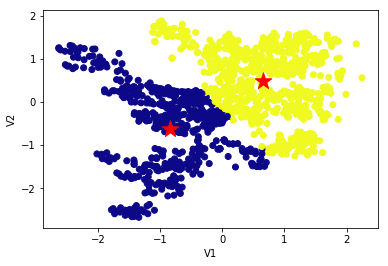

In [15]:
plt.xlabel('V1')
plt.ylabel('V2')

plt.scatter(data_normalized['V1'], data_normalized['V2'], c=km_res, cmap='plasma')
#plt.plot(clusters[:,0], clusters[:,1], 'rs')
plt.scatter(clusters[:,0], clusters[:,1], s=300, c='r', marker='*')
#plt.scatter(v1_mean, v2_mean, s=50)
plt.savefig('fig1')
plt.show()

In [14]:
data.describe()

,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000
